# **Dropout technique to prevent Overfitting**
### Concept: Random Forest Analogy with Column Sampling only
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Regression Problem

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples =100, n_features = 1,noise = 5 )

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

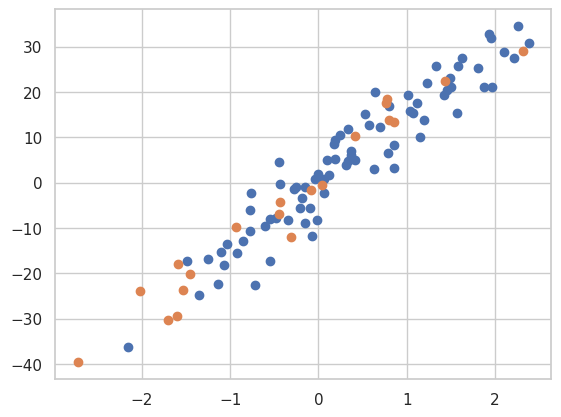

In [5]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

## ANN Architecture

In [6]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim=1))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate = 0.001)
model.compile(optimizer = adam,loss = 'mse',metrics = ['mse'])
history = model.fit(x_train,y_train,epochs = 500,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 263.7794 - mse: 263.7794 - val_loss: 391.4992 - val_mse: 391.4992
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 270.3625 - mse: 270.3625 - val_loss: 384.3399 - val_mse: 384.3399
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 271.3418 - mse: 271.3418 - val_loss: 377.6926 - val_mse: 377.6926
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 237.8407 - mse: 237.8407 - val_loss: 371.0239 - val_mse: 371.0239
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 228.5203 - mse: 228.5203 - val_loss: 364.1396 - val_mse: 364.1396
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 224.7007 - mse: 224.7007 - val_loss: 356.6800 - val_mse: 356.6800
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 222.6041 - mse: 222.6041 - val_loss: 348.4831 - val_mse: 348.4831
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 238.0669 - mse: 238.0669 - val_loss: 339.7455 - val_mse: 339.7455
Epoch 9

In [7]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


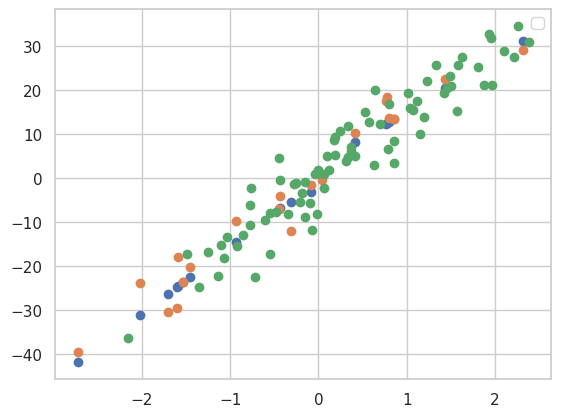

In [18]:
plt.scatter(x_test,y_pred)
plt.scatter(x_test,y_test)
plt.scatter(x_train,y_train)
plt.legend()

In [9]:
pd.DataFrame(history.history).head()

,loss,mse,val_loss,val_mse
0,262.926788,262.926788,391.499207,391.499207
1,257.790009,257.790009,384.339935,384.339935
2,253.238815,253.238815,377.692596,377.692596
3,248.401215,248.401215,371.023865,371.023865
4,244.006912,244.006912,364.139557,364.139557


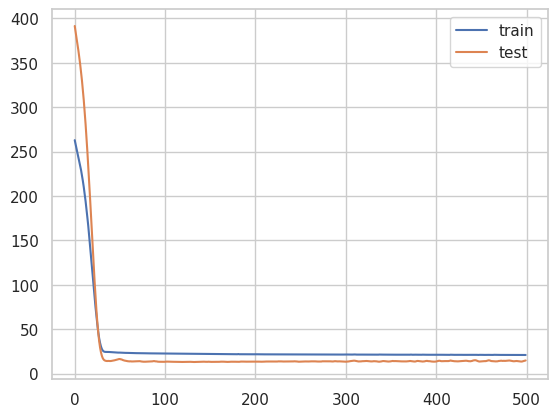

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])

## Model with Dropout

In [12]:
model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim=1))
model1.add(Dropout(0.2))
model1.add(Dense(128,activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate = 0.001)
model1.compile(optimizer = adam,loss = 'mse',metrics = ['mse'])
history1 = model1.fit(x_train,y_train,epochs = 500,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 260.6395 - mse: 260.6395 - val_loss: 387.6181 - val_mse: 387.6181
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 263.6815 - mse: 263.6815 - val_loss: 379.3851 - val_mse: 379.3851
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 238.0894 - mse: 238.0894 - val_loss: 371.0898 - val_mse: 371.0898
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 264.0544 - mse: 264.0544 - val_loss: 362.0405 - val_mse: 362.0405
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 258.8545 - mse: 258.8545 - val_loss: 352.2687 - val_mse: 352.2687
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 236.3204 - mse: 236.3204 - val_loss: 341.8947 - val_mse: 341.8947
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 233.9857 - mse: 233.9857 - val_loss: 330.5464 - val_mse: 330.5464
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 239.9767 - mse: 239.9767 - val_loss: 318.0007 - val_mse: 318.0007
Epoch 9/

In [13]:
y_pred1 = model1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


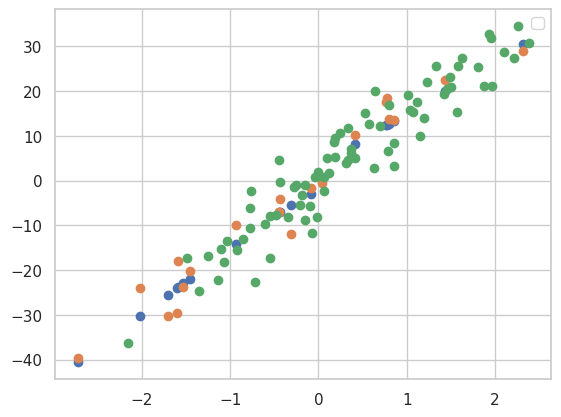

In [17]:
plt.scatter(x_test,y_pred1)
plt.scatter(x_test,y_test)
plt.scatter(x_train,y_train)
plt.legend()

In [15]:
pd.DataFrame(history1.history).head()

,loss,mse,val_loss,val_mse
0,265.283783,265.283783,387.618103,387.618103
1,260.086823,260.086823,379.385071,379.385071
2,254.716461,254.716461,371.089752,371.089752
3,249.251297,249.251297,362.040466,362.040466
4,243.318817,243.318817,352.268738,352.268738


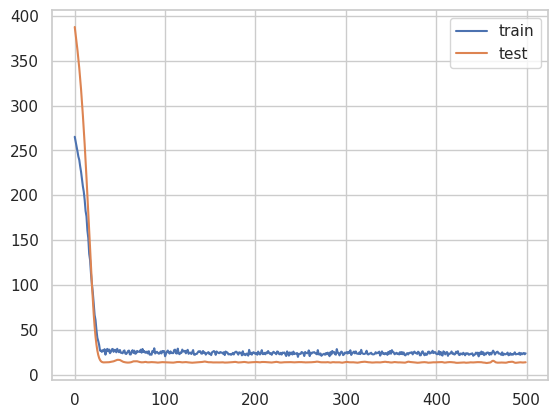

In [16]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train','test'])

In [19]:
model2 = Sequential()
model2.add(Dense(128,activation = 'relu',input_dim=1))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation = 'linear'))

adam = Adam(learning_rate = 0.001)
model2.compile(optimizer = adam,loss = 'mse',metrics = ['mse'])
history2 = model2.fit(x_train,y_train,epochs = 500,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 272.7050 - mse: 272.7050 - val_loss: 389.6585 - val_mse: 389.6585
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 264.6527 - mse: 264.6527 - val_loss: 381.8889 - val_mse: 381.8889
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 261.7894 - mse: 261.7894 - val_loss: 374.4703 - val_mse: 374.4703
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 255.1299 - mse: 255.1299 - val_loss: 366.8898 - val_mse: 366.8898
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 249.6250 - mse: 249.6250 - val_loss: 359.2568 - val_mse: 359.2568
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 243.8642 - mse: 243.8642 - val_loss: 351.3680 - val_mse: 351.3680
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 240.7789 - mse: 240.7789 - val_loss: 342.9420 - val_mse: 342.9420
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 227.6093 - mse: 227.6093 - val_loss: 334.0235 - val_mse: 334.0235
Epoch 9/

In [20]:
y_pred2 = model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


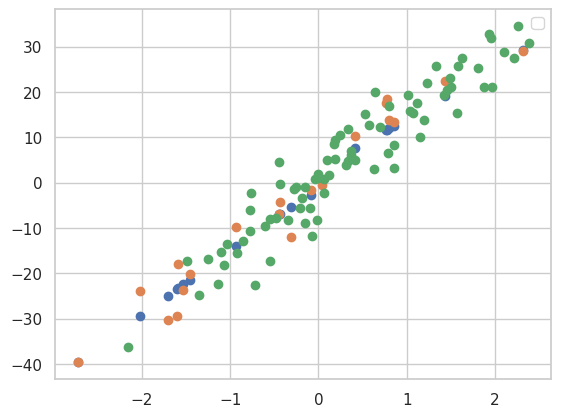

In [21]:
plt.scatter(x_test,y_pred2)
plt.scatter(x_test,y_test)
plt.scatter(x_train,y_train)
plt.legend()

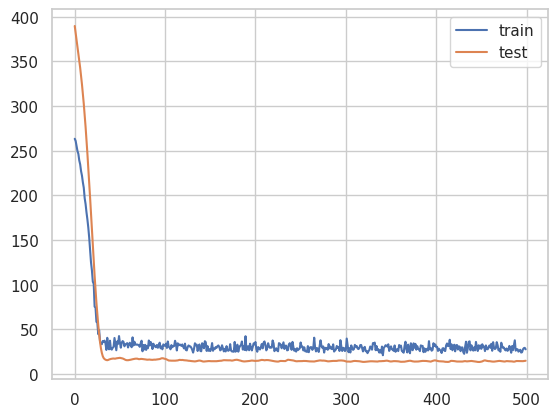

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train','test'])

In [23]:
r2_score(y_test,y_pred),r2_score(y_test,y_pred1),r2_score(y_test,y_pred2)

(0.9608358553370864, 0.9629494827632575, 0.9602914594606362)

In [27]:
(r2_score(y_test,y_pred1)-r2_score(y_test,y_pred))/r2_score(y_test,y_pred)*100,(r2_score(y_test,y_pred2)-r2_score(y_test,y_pred))/r2_score(y_test,y_pred)*100

(0.21997799253959407, -0.05665857216154544)

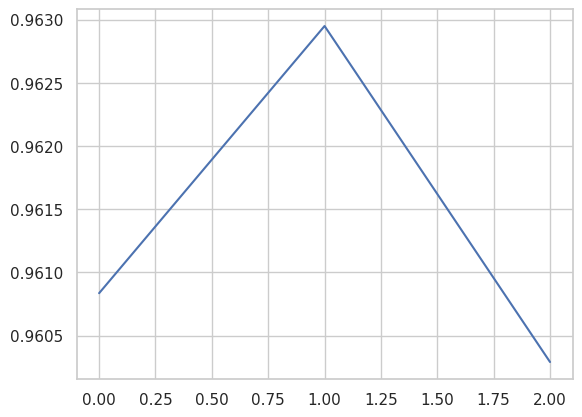

In [24]:
plt.plot([r2_score(y_test,y_pred),r2_score(y_test,y_pred1),r2_score(y_test,y_pred2)])